[1894. 1894. 1894. ... 1899. 1899. 1900.] 1986.0 1894.0
[-305. -305. -305. ... -308. -308. -308.] -303.0 -320.0
209.0 212.0 178.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0
-306.0


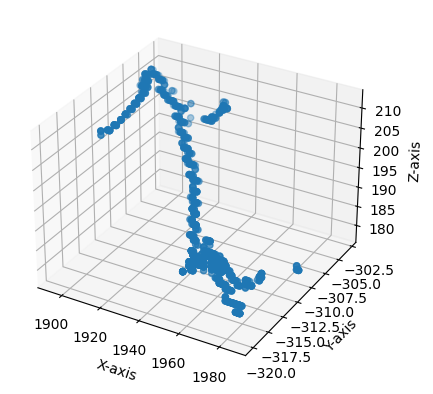

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy array from the .npy file
data = np.load('/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/data/edepsim_npys/edepsim_pc/04401088-0.npy')
# /global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/data/edepsim_npys/edepsim_pc/04401088-0.npy

# Separate the x, y, z coordinates
x = data[:, 0]  # Extract x coordinates from the first column
y = data[:, 1]  # Extract y coordinates from the second column
z = data[:, 2]  # Extract z coordinates from the third column

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the points
ax.scatter(x, y, z) #c='blue', marker='o'

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

print(x, max(x), min(x))
print(y, max(y), min(y))
print(z[23], max(z), min(z))

for i in range(30):
    print(y[i+70])

plt.show()

In [13]:
from pointnet2_ops import pointnet2_utils
import torch



def fps(data, number):
    '''
        data B N 3
        number int
    '''
    print('RAW DATA IS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!', data)
    fps_idx = pointnet2_utils.furthest_point_sample(data, number) 
    print('FPS_IDX IS!!!!!!!!!!!!!!!', fps_idx, len(fps_idx))
    fps_data = pointnet2_utils.gather_operation(data.transpose(1, 2).contiguous(), fps_idx).transpose(1,2).contiguous()
    print('FPS_DATA IS!!!!!!!!!!!!!!', fps_data, len(fps_data))
    return fps_data




# Assume 'data' is your input point cloud data of shape B N 3
# B: Batch size, N: Number of points, 3: x, y, z coordinates

# Generate sample input data (replace this with your actual data)
batch_size2 = 32
num_points2 = 64
data = torch.randn(batch_size2, num_points2, 3)  # Replace this with your actual data
print(data)

# Choose the number of points you want to sample
number = 5

# Call the fps function with the provided data and number
result = fps(data, number)


tensor([[[ 1.0023e+00, -1.8708e+00, -9.7185e-01],
         [-4.5797e-01,  1.3957e+00, -1.1950e+00],
         [ 5.1878e-01,  1.0181e+00,  3.7038e-01],
         ...,
         [ 4.9074e-01,  7.8826e-01,  5.6010e-01],
         [-9.7469e-01,  5.6144e-01,  2.7930e+00],
         [ 3.4581e-01, -7.4471e-01, -1.1863e+00]],

        [[ 2.3336e-02,  4.3751e-01,  4.6857e-01],
         [ 5.6932e-01, -1.2123e-01,  1.1275e+00],
         [-6.1741e-01,  3.2215e-01,  4.6352e-01],
         ...,
         [-1.1137e+00,  5.5252e-01,  2.9806e-02],
         [ 1.4357e+00,  1.2362e+00, -4.3174e-01],
         [-1.6681e+00, -7.5319e-02,  3.0016e-01]],

        [[-2.8693e-01,  1.2704e+00, -1.9178e+00],
         [ 3.3134e-01,  2.5306e+00, -1.0902e+00],
         [-7.8712e-01, -2.2139e-02, -9.6999e-01],
         ...,
         [-1.1011e+00, -3.1515e-01, -8.6825e-02],
         [ 5.3334e-01,  5.0910e-01,  1.7643e+00],
         [ 3.0075e+00,  1.5736e+00,  2.4319e-01]],

        ...,

        [[-5.4036e-01,  3.3424e-01, -3

RuntimeError: false INTERNAL ASSERT FAILED at "/global/u1/s/silentc/MAE3D/pointnet2_ops_lib/pointnet2_ops/_ext-src/src/sampling.cpp":83, please report a bug to PyTorch. CPU not supported